In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

board_games = pd.read_csv('board_games.csv')
print(board_games.head(5))

       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0           2005           2           2          180          180   
1           2012           2           5          150           60   
2           2013           1           7          210           30   
3           2006           2           4          240          240   
4           2002           2           5          150           90   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0          180      13        20113         8.33774               8.22186   
1          150      12

In [39]:
print(board_games.shape)
board_games = board_games.dropna()
print(board_games.shape)

(81312, 20)
(81268, 20)


In [40]:
board_games = board_games[board_games['users_rated']!=0]
print(board_games.shape)

(56894, 20)


Till now, we have loaded in the data, dropped rows where the column value = NA.
Also, we have dropped the rows where the 'users_rated' = 0 i.e those board games that do not have any reviews.

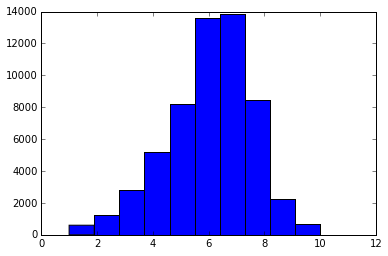

In [41]:
plt.hist(board_games['average_rating'])
plt.show()

In [42]:
standard_dev = np.std(board_games['average_rating'])
print(standard_dev)

1.57881605958


In [43]:
mean = np.mean(board_games['average_rating'])
print(mean)

6.01611284933


According to the values above, we see that the average_rating has a mean of 6.01 as compared to a standard deviation of 1.58. 
As an error metric, we choose the mean, because according to the histogram, majority of the board games lie between 5 - 7 which includes the mean. 
Also, the standard deviation is only 1.57 which might not be get us more accurate results.

In [44]:
numeric_columns = board_games.iloc[:,3:]
print(numeric_columns.head(2))

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0           2005           2           2          180          180   
1           2012           2           5          150           60   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0          180      13        20113         8.33774               8.22186   
1          150      12        14383         8.28798               8.14232   

   total_owners  total_traders  total_wanters  total_wishers  total_comments  \
0         26647            372           1219           5865            5347   
1         16519            132           1586           6277            2526   

   total_weights  average_weight  
0           2562          3.4785  
1           1423          3.8939  


In [45]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters = 5, random_state = 1)
numeric_columns_distances = kmeans_model.fit_transform(numeric_columns)
labels = kmeans_model.labels_
print(labels)

[1 1 1 ..., 0 0 0]


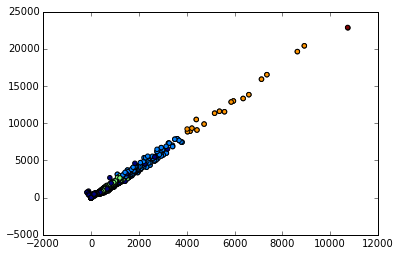

In [46]:
game_mean = numeric_columns.apply(np.mean,axis=1)
game_std = numeric_columns.apply(np.std,axis=1)
plt.scatter(x=game_mean,y=game_std,c=labels)
plt.show()

From the above scatterplot, you can see that there are clearly 2 clusters forming and that the mean and standard deviation are linearly related to each other.

In [47]:
correlations = numeric_columns.corr()
print(correlations['average_rating'])

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


From the correlations above, minplayers and maxplayers columns have a negative correlation to average_rating which is surprising since min and max players should have somehow been correlated to the rating of a board game.
Also, the most correlated column is the average_weight.

In [48]:
#Dropping those columns whose correlation is below 0.1

numeric_columns = numeric_columns[['yearpublished','minage','average_rating','users_rated','total_owners','total_traders','total_wanters','total_wishers','total_comments','total_weights','average_weight']]

In [49]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
predictors = numeric_columns[['minage','average_weight']]
to_predict = numeric_columns['average_rating']
reg.fit(predictors,to_predict)
predictions = reg.predict(predictors)
print(predictions)

[ 7.15311346  7.28359492  7.23487475 ...,  6.16936732  5.50785613
  6.12823178]


In [50]:
difference = to_predict - predictions
difference = difference ** 2
total = sum(difference)
mse = total / len(to_predict)
print(mse)

2.14766593643


From the mse value of 2.15, we can conclude that the predictors we chose to predict the average_rating column, are quite good and provide a strong correlation.